##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:
entraine un modèle de classification pour prédiction

Prend en entrée les fichiers:
    (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test_cat.csv, y_train_cat.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.

Fournit en sortie les fichiers:

     (models)/?.pkl à déterminer


In [15]:
# Pour une exécution indépendante des travaux sur chaque modèle: Charger les données depuis les fichiers CSV

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('future.no_silent_downcasting', True)
              
def load_our_data_cat():
    # charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
    %run init_notebook.py

    X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
    X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
    y_train = pd.read_csv(base_processed + 'y_train_cat.csv')
    y_test = pd.read_csv(base_processed + 'y_test_cat.csv')
    X_train_scaled = X_train_scaled.replace({False: 0, True: 1}).astype(float)
    X_test_scaled = X_test_scaled.replace({False: 0, True: 1}).astype(float)
    #
    y_column = "categorie"
    y_train = y_train[y_column]
    y_test = y_test[y_column]
    return X_train_scaled, X_test_scaled, y_train, y_test


# Classification par k-NN

In [16]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  # nombre de cœurs physiques réels


In [17]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data_cat()

In [18]:
# hyperparamètres du modèle 
# pour info, la 1ere fois on initialise avec 10 voisins. 
n_neighbors = 5

In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Entraîner le modèle
knn_model.fit(X_train_scaled, y_train)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


Précision du modèle k-NN : 0.88
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.77      0.71      0.74      1441
         3.0       0.86      0.88      0.87      6138
         4.0       0.84      0.85      0.84      5435
         5.0       0.88      0.87      0.88      5061
         6.0       0.91      0.89      0.90      2610
         7.0       0.94      0.94      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.88      0.88      0.88     24735
weighted avg       0.88      0.88      0.88     24735

Matrice de confusion :
[[2883    2    1    0    1    0    0]
 [   4 1030  399    6    2    0    0]
 [   5  292 5383  451    7    0    0]
 [   5   11  452 4599  366    0    2]
 [   1    3   11  440 4409  183   14]
 [   1    0    1    3  223 2326   56]
 [   0    0    0    1    6   59 1097]]
F1-Score : 0.88
Recall : 0.88




Résultats pour k=5:
Précision du modèle k-NN : 0.88
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.77      0.71      0.74      1441
         3.0       0.86      0.88      0.87      6138
         4.0       0.84      0.85      0.84      5435
         5.0       0.88      0.87      0.88      5061
         6.0       0.91      0.89      0.90      2610
         7.0       0.94      0.94      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.88      0.88      0.88     24735
weighted avg       0.88      0.88      0.88     24735

Matrice de confusion :  
[[2883  2   1   0   1   0   0]  
 [   4 1030  399    6    2    0    0]  
 [   5  292 5383  451    7    0    0]  
 [   5   11  452 4599  366    0    2]  
 [   1    3   11  440 4409  183   14]  
 [   1    0    1    3  223 2326   56]  
 [   0    0    0    1    6   59 1097]]  
F1-Score : 0.88  
Recall : 0.88  
  
On observe que la classe 2 est la moins bien prédite, le modèle en place une bonne partie dans la classe 3  

Avec k=7 ce sont quasiment les mêmes chiffres.
Avec k=3 les résultats sont un peu moins bons.  
Avec k=4 ou 5, selon les classes, on peut considérer que les résultats sont meilleurs. k=5 donne le meilleur F1-score de 0.88

In [21]:
# représentation type matrice de confusion avec boules proportionnelles
""" import matplotlib.pyplot as plt
import pandas as pd

# Combiner y_test et y_pred dans un DataFrame pour calculer les fréquences
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
data['count'] = data.groupby(['y_test', 'y_pred'])['y_test'].transform('count')

# Taille des points proportionnelle à la fréquence
sizes = data['count']

# Tracer le graphique
plt.figure(figsize=(8, 8))
plt.scatter(data['y_test'], data['y_pred'], s=sizes, alpha=0.7, label='Données')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.title("Graphique de Dispersion : Valeurs Réelles vs Prédites (Taille proportionnelle)")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)
plt.legend()
plt.show() """


' import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Combiner y_test et y_pred dans un DataFrame pour calculer les fréquences\ndata = pd.DataFrame({\'y_test\': y_test, \'y_pred\': y_pred})\ndata[\'count\'] = data.groupby([\'y_test\', \'y_pred\'])[\'y_test\'].transform(\'count\')\n\n# Taille des points proportionnelle à la fréquence\nsizes = data[\'count\']\n\n# Tracer le graphique\nplt.figure(figsize=(8, 8))\nplt.scatter(data[\'y_test\'], data[\'y_pred\'], s=sizes, alpha=0.7, label=\'Données\')\nplt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=\'red\', linestyle=\'--\', label=\'y = x\')\nplt.title("Graphique de Dispersion : Valeurs Réelles vs Prédites (Taille proportionnelle)")\nplt.xlabel("Valeurs Réelles")\nplt.ylabel("Valeurs Prédites")\nplt.grid(True)\nplt.legend()\nplt.show() '

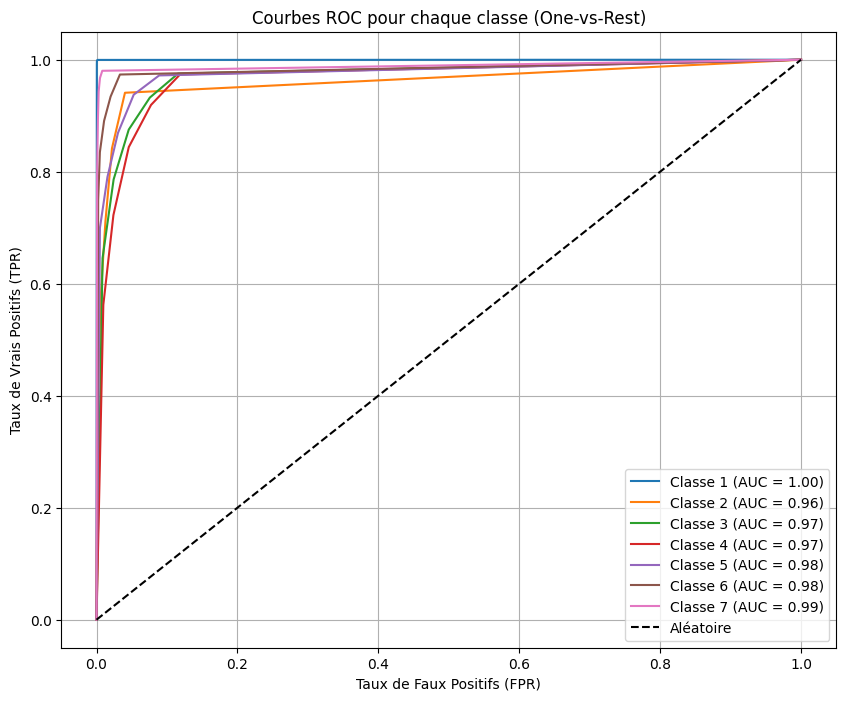

In [9]:
# courbe ROC pour nos 7 classes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisation des labels (OvR, One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7])

# Obtenir les probabilités prédites pour chaque classe
y_pred_proba = knn_model.predict_proba(X_test_scaled)

# Initialiser le graphique
plt.figure(figsize=(10, 8))

# Tracer la courbe ROC pour chaque classe
for i in range(7):  # Nombre de classes
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i+1} (AUC = {roc_auc:.2f})')

# Ligne diagonale (aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label="Aléatoire")

# Personnalisation du graphique
plt.title("Courbes ROC pour chaque classe (One-vs-Rest)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc='lower right')
plt.grid()
plt.show()


Sur le modèle de dispersion, on confirme ce qu'on voit dans le rapport de classification et la matrice de confusion:  
Le modèle sous-évalue la classe 2. Et il sur-évalue la classe 3, et dans une moindre mesure les classes 4 et 5.  

On va essayer de diminuer la représentation de ces classes dans les données d'entraînement.  

In [22]:
import pandas as pd
from sklearn.utils import resample

# Convertir nos données X_train et y_train en DataFrame pour manipulation facile
data = pd.DataFrame(X_train_scaled)
data['y'] = y_train

# Classes à réduire
classes_a_diviser_par_3 = [3, 4]
classes_a_diviser_par_2_5 = [5]

# Liste pour stocker les sous-échantillons
sous_echantillons = []

for classe in data['y'].unique():
    data_classe = data[data['y'] == classe]
    
    if classe in classes_a_diviser_par_3:
        # Réduire le nombre d'échantillons de moitié
        data_classe = resample(data_classe, replace=False, n_samples=len(data_classe) // 3, random_state=42)

    elif classe in classes_a_diviser_par_2_5:
        # Réduire le nombre d'échantillons de 2,5
        data_classe = resample(data_classe, replace=False, n_samples=len(data_classe) // 2, random_state=42)
    
    sous_echantillons.append(data_classe)

# Combiner les sous-échantillons pour obtenir un jeu de données final
data_reduit = pd.concat(sous_echantillons)

# Séparer X_train_scaled et y_train après réduction
X_train_reduit = data_reduit.drop(columns=['y']).values
y_train_reduit = data_reduit['y'].values

print(f"Taille initiale du jeu d'entraînement : {len(y_train)}")
print(f"Taille du jeu d'entraînement après réduction : {len(y_train_reduit)}")


Taille initiale du jeu d'entraînement : 98939
Taille du jeu d'entraînement après réduction : 57817


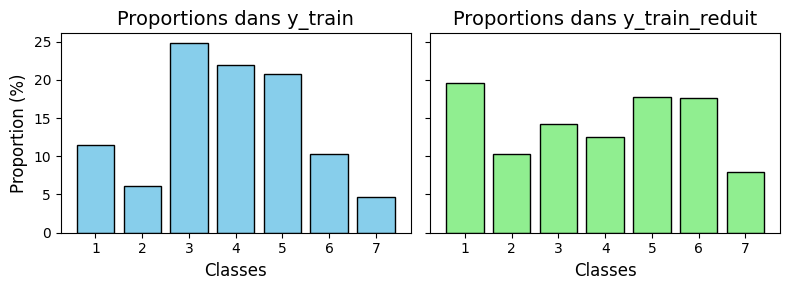

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des proportions des classes dans y_train
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
proportions_train = counts_train / len(y_train) * 100  # En pourcentage

# Calcul des proportions des classes dans y_train_reduit
unique_classes_reduit, counts_reduit = np.unique(y_train_reduit, return_counts=True)
proportions_reduit = counts_reduit / len(y_train_reduit) * 100  # En pourcentage

# Création des bar graphs côte à côte
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Graphique pour y_train
axes[0].bar(unique_classes_train, proportions_train, color='skyblue', edgecolor='black')
axes[0].set_title("Proportions dans y_train", fontsize=14)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Proportion (%)", fontsize=12)
axes[0].set_xticks(unique_classes_train)

# Graphique pour y_train_reduit
axes[1].bar(unique_classes_reduit, proportions_reduit, color='lightgreen', edgecolor='black')
axes[1].set_title("Proportions dans y_train_reduit", fontsize=14)
axes[1].set_xlabel("Classes", fontsize=12)
axes[1].set_xticks(unique_classes_reduit)

# Ajustements et affichage
plt.tight_layout()
plt.show()


In [24]:
# on entraine notre modèle avec la version en classes égalisées de nos données
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Entraîner le modèle
knn_model.fit(X_train_reduit, y_train_reduit)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


c:\Users\local\anaconda\envs\DST\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Précision du modèle k-NN : 0.86
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.65      0.86      0.74      1441
         3.0       0.87      0.80      0.83      6138
         4.0       0.81      0.81      0.81      5435
         5.0       0.86      0.85      0.85      5061
         6.0       0.87      0.90      0.89      2610
         7.0       0.94      0.93      0.94      1163

    accuracy                           0.86     24735
   macro avg       0.86      0.88      0.87     24735
weighted avg       0.86      0.86      0.86     24735

Matrice de confusion :
[[2883    3    0    0    0    1    0]
 [   4 1235  198    3    1    0    0]
 [   5  624 4887  612    9    1    0]
 [   5   20  503 4390  509    4    4]
 [   1    9   14  436 4321  263   17]
 [   1    0    1    1  206 2357   44]
 [   0    0    0    1    3   73 1086]]
F1-Score : 0.86
Recall : 0.86


In [40]:
""" import matplotlib.pyplot as plt
import pandas as pd

# Combiner y_test et y_pred dans un DataFrame pour calculer les fréquences
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
data['count'] = data.groupby(['y_test', 'y_pred'])['y_test'].transform('count')

# Taille des points proportionnelle à la fréquence
sizes = data['count']

# Tracer le graphique
plt.figure(figsize=(8, 8))
plt.scatter(data['y_test'], data['y_pred'], s=sizes, alpha=0.7, label='Données')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.title("Graphique de Dispersion, après égalisation des classes en set d'entraînement")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)
plt.legend()
plt.show()
 """

' import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Combiner y_test et y_pred dans un DataFrame pour calculer les fréquences\ndata = pd.DataFrame({\'y_test\': y_test, \'y_pred\': y_pred})\ndata[\'count\'] = data.groupby([\'y_test\', \'y_pred\'])[\'y_test\'].transform(\'count\')\n\n# Taille des points proportionnelle à la fréquence\nsizes = data[\'count\']\n\n# Tracer le graphique\nplt.figure(figsize=(8, 8))\nplt.scatter(data[\'y_test\'], data[\'y_pred\'], s=sizes, alpha=0.7, label=\'Données\')\nplt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=\'red\', linestyle=\'--\', label=\'y = x\')\nplt.title("Graphique de Dispersion, après égalisation des classes en set d\'entraînement")\nplt.xlabel("Valeurs Réelles")\nplt.ylabel("Valeurs Prédites")\nplt.grid(True)\nplt.legend()\nplt.show()\n '


🔹 Matrice de confusion pour k-NN 🔹


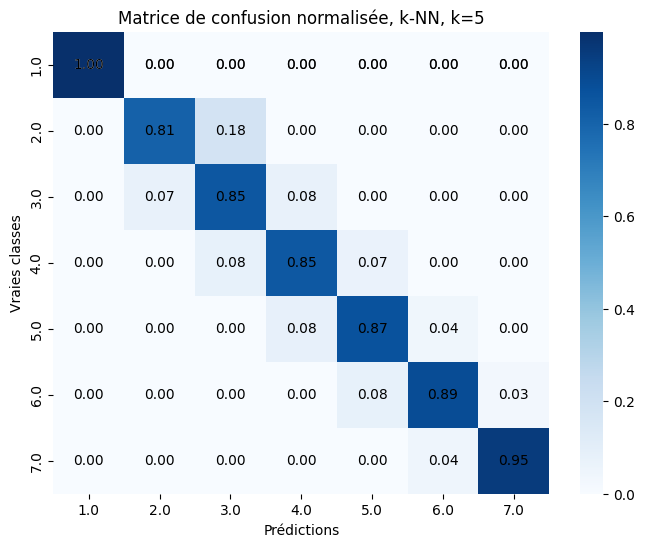

In [29]:
print(f"\n🔹 Matrice de confusion pour {name} 🔹")
# Prédictions
y_pred = knn_model.predict(X_test_scaled)

# Matrice de confusion brute
cm = confusion_matrix(y_test, y_pred)

# Normalisation par le nombre total de chaque classe
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Affichage
plt.figure(figsize=(8, 6))

# Heatmap avec les deux annotations
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Ajout des valeurs brutes sur une deuxième couche d'annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{cm_normalized[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=10)

plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title(f"Matrice de confusion normalisée, {name}, k={n_neighbors}")
plt.show()

Au final, c'est moins bien ainsi.  

On va donc essayer d'utiliser SMOTE pour rééquilibrer les classes, plutot que diminuer le nombre d'échantillons dans les classes majoritaires.

In [26]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Rééchantillonner les données
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Vérifier les nouvelles proportions des classes
unique_classes, counts = np.unique(y_train_balanced, return_counts=True)
print("Distribution des classes après SMOTE :")
for classe, count in zip(unique_classes, counts):
    print(f"Classe {classe} : {count} échantillons")


Distribution des classes après SMOTE :
Classe 1.0 : 24576 échantillons
Classe 2.0 : 24576 échantillons
Classe 3.0 : 24576 échantillons
Classe 4.0 : 24576 échantillons
Classe 5.0 : 24576 échantillons
Classe 6.0 : 24576 échantillons
Classe 7.0 : 24576 échantillons


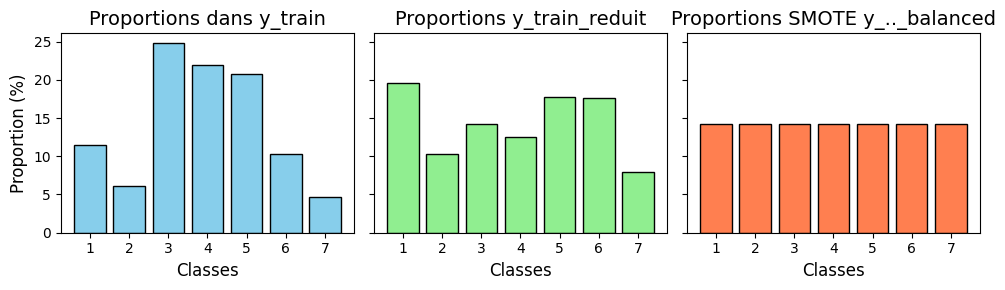

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des proportions des classes dans y_train
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
proportions_train = counts_train / len(y_train) * 100  # En pourcentage

# Calcul des proportions des classes dans y_train_reduit
unique_classes_reduit, counts_reduit = np.unique(y_train_reduit, return_counts=True)
proportions_reduit = counts_reduit / len(y_train_reduit) * 100  # En pourcentage

# Calcul des proportions des classes dans y_train_balanced
unique_classes_balanced, counts_balanced = np.unique(y_train_balanced, return_counts=True)
proportions_balanced = counts_balanced / len(y_train_balanced) * 100  # En pourcentage

# Création des bar graphs côte à côte
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

# Graphique pour y_train
axes[0].bar(unique_classes_train, proportions_train, color='skyblue', edgecolor='black')
axes[0].set_title("Proportions dans y_train", fontsize=14)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Proportion (%)", fontsize=12)
axes[0].set_xticks(unique_classes_train)

# Graphique pour y_train_reduit
axes[1].bar(unique_classes_reduit, proportions_reduit, color='lightgreen', edgecolor='black')
axes[1].set_title("Proportions y_train_reduit", fontsize=14)
axes[1].set_xlabel("Classes", fontsize=12)
axes[1].set_xticks(unique_classes_reduit)

# Graphique pour y_train_balanced
axes[2].bar(unique_classes_balanced, proportions_balanced, color='coral', edgecolor='black')
axes[2].set_title("Proportions SMOTE y_.._balanced", fontsize=14)
axes[2].set_xlabel("Classes", fontsize=12)
axes[2].set_xticks(unique_classes_balanced)


# Ajustements et affichage
plt.tight_layout()
plt.show()


In [28]:
# on entraine notre modèle avec la version en classes égalisées via SMOTE
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Entraîner le modèle
knn_model.fit(X_train_balanced, y_train_balanced)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


Précision du modèle k-NN : 0.88
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.71      0.81      0.76      1441
         3.0       0.88      0.85      0.86      6138
         4.0       0.83      0.85      0.84      5435
         5.0       0.88      0.87      0.87      5061
         6.0       0.90      0.89      0.89      2610
         7.0       0.92      0.95      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.87      0.89      0.88     24735
weighted avg       0.88      0.88      0.88     24735

Matrice de confusion :
[[2883    4    0    0    0    0    0]
 [   3 1167  266    4    1    0    0]
 [   5  458 5197  471    7    0    0]
 [   5   14  436 4597  376    3    4]
 [   1    4    9  430 4388  213   16]
 [   1    0    0    3  206 2324   76]
 [   0    0    0    1    3   51 1108]]
F1-Score : 0.88
Recall : 0.88


Après SMOTE également, le modèle k-NN n'est pas meilleur que l'original

In [31]:
import joblib

# Chemin pour enregistrer le modèle
model_path = base_models + 'knn_cat.pkl'

# Enregistrer le modèle
joblib.dump(knn_model, model_path)

print(f"Modèle k-NN enregistré dans {model_path}")


Modèle k-NN enregistré dans ../models/knn_cat.pkl
